# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warings
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('/content/marketing_campaign.csv',sep ='\t')

In [ ]:
pd.set_option('display.max_column',None)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_birth           2240 non-null   int64  
 1   education            2240 non-null   object 
 2   marital_status       2240 non-null   object 
 3   income               2216 non-null   float64
 4   kidhome              2240 non-null   int64  
 5   teenhome             2240 non-null   int64  
 6   dt_customer          2240 non-null   object 
 7   recency              2240 non-null   int64  
 8   mntwines             2240 non-null   int64  
 9   mntfruits            2240 non-null   int64  
 10  mntmeatproducts      2240 non-null   int64  
 11  mntfishproducts      2240 non-null   int64  
 12  mntsweetproducts     2240 non-null   int64  
 13  mntgoldprods         2240 non-null   int64  
 14  numdealspurchases    2240 non-null   int64  
 15  numwebpurchases      2240 non-null   i

# Preprocessing

**Check missing values**

In [ ]:
df.isnull().sum()

,0
year_birth,0
education,0
marital_status,0
income,24
kidhome,0
teenhome,0
dt_customer,0
recency,0
mntwines,0
mntfruits,0


<Axes: >

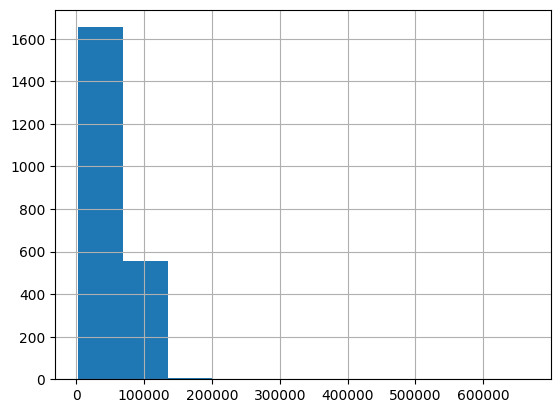

In [ ]:
df['income'].hist()

In [ ]:
df['income'].fillna(df['income'].median(),inplace=True) # choose median bec. there is outliers

**check duplicated values**

In [ ]:
df.duplicated().sum()

182

In [ ]:
df.drop_duplicates(inplace=True)

**Map Object_columns**

In [ ]:
df.select_dtypes(object).columns

Index(['education', 'marital_status', 'dt_customer'], dtype='object')

In [ ]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
wrapper={'Graduation':0,'PhD':1,'Master':2,'Basic':3,'2n Cycle':4}
df['education']=df['education'].replace(wrapper)

In [ ]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
wrapper={'Single':0,'Together':1,'Married':2,'Divorced':3,'Widow':4,'Alone':5,'Absurd':6,'YOLO':7}
df['marital_status']=df['marital_status'].replace(wrapper)

In [ ]:
df['dt_customer']

,dt_customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
5,09-09-2013
6,13-11-2012
7,08-05-2013
8,06-06-2013
9,13-03-2014


In [ ]:
df['dt_customer']=pd.to_datetime(df['dt_customer'],format='%d-%m-%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_birth           2058 non-null   int64         
 1   education            2058 non-null   int64         
 2   marital_status       2058 non-null   int64         
 3   income               2058 non-null   float64       
 4   kidhome              2058 non-null   int64         
 5   teenhome             2058 non-null   int64         
 6   dt_customer          2058 non-null   datetime64[ns]
 7   recency              2058 non-null   int64         
 8   mntwines             2058 non-null   int64         
 9   mntfruits            2058 non-null   int64         
 10  mntmeatproducts      2058 non-null   int64         
 11  mntfishproducts      2058 non-null   int64         
 12  mntsweetproducts     2058 non-null   int64         
 13  mntgoldprods         2058 non-null   i

In [ ]:
df.describe()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
count,2058.000000,2058.00000,2058.000000,2058.000000,2058.000000,2058.000000,2058,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000
mean,1968.787172,0.98688,1.498542,52346.406220,0.445578,0.509232,2013-07-11 12:50:22.740524800,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089
min,1893.000000,0.00000,0.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,0.00000,1.000000,35701.750000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,0.00000,2.000000,51381.500000,0.000000,0.000000,2013-07-12 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,2.00000,2.000000,68242.500000,1.000000,1.000000,2014-01-01 00:00:00,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,4.00000,7.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,11.973898,1.25864,1.081172,25377.819022,0.537556,0.546489,NaN,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195


**drop unnecessary** **columns**

In [ ]:
df.drop(['z_costcontact','z_revenue'],axis=1,inplace=True)

**Outliers **

In [ ]:
# columns have high Std
x=['recency',	'mntwines',	'mntfruits',	'mntmeatproducts','mntfishproducts' ,	'mntsweetproducts'	,'mntgoldprods']

{'whiskers': [<matplotlib.lines.Line2D at 0x794218d03b50>,
 'caps': [<matplotlib.lines.Line2D at 0x794218cf5930>,
 'boxes': [<matplotlib.lines.Line2D at 0x794218d03490>],
 'medians': [<matplotlib.lines.Line2D at 0x794218cf4040>],
 'fliers': [<matplotlib.lines.Line2D at 0x794218cf4580>],
 'means': []}

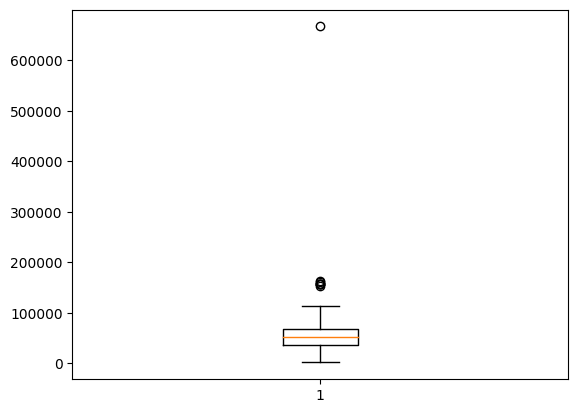

In [ ]:
plt.boxplot(df['income'])

In [ ]:
Q1=df['income'].quantile(0.25)
Q3=df['income'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR

In [ ]:
df['income'][df['income']>Q3]=thre

{'whiskers': [<matplotlib.lines.Line2D at 0x794218c860b0>,
 'caps': [<matplotlib.lines.Line2D at 0x794218c865f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x794218c85e10>,
 'medians': [<matplotlib.lines.Line2D at 0x794218c86b30>,
 'fliers': [<matplotlib.lines.Line2D at 0x794218c86dd0>,
 'means': []}

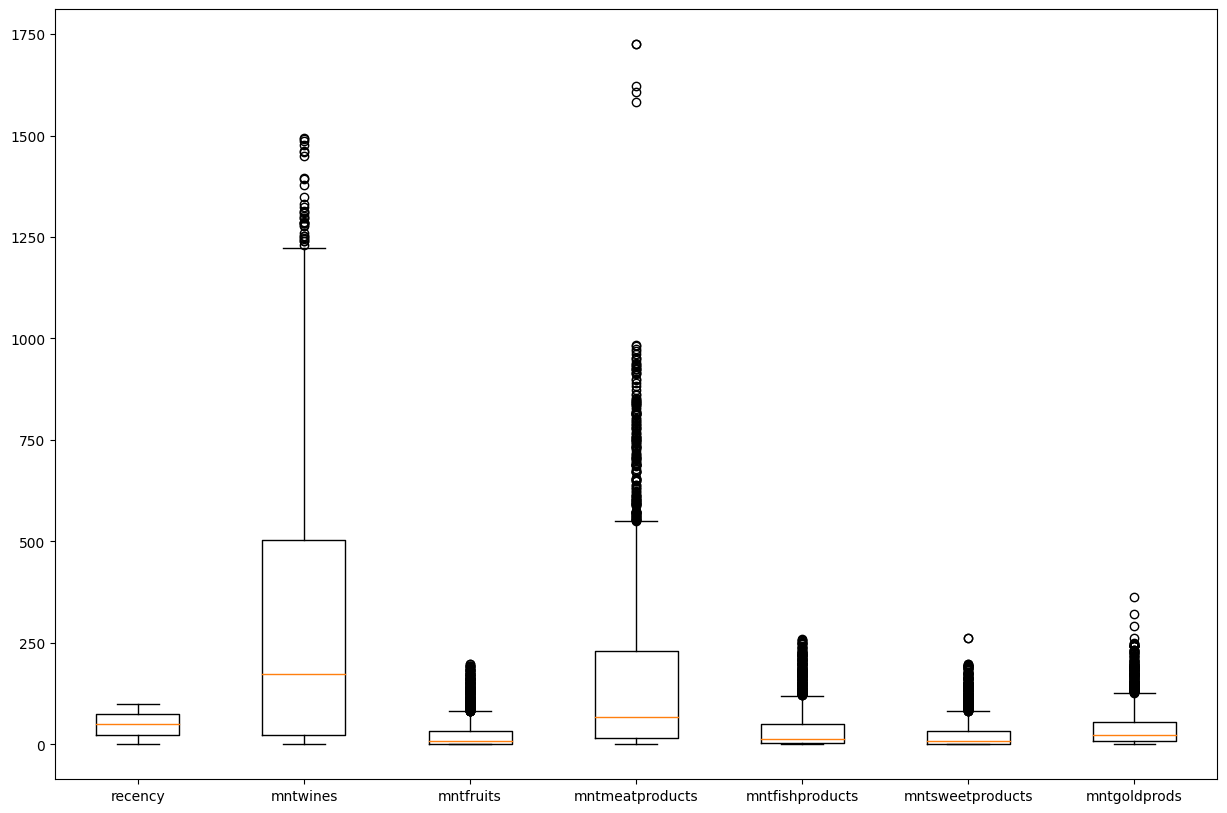

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot(df[x],labels=x)

solve outliers by casting method

In [ ]:
Q1=df['mntwines'].quantile(0.25)
Q3=df['mntwines'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntwines'][df['mntwines']>Q3]=thre

In [ ]:
Q1=df['mntfruits'].quantile(0.25)
Q3=df['mntfruits'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntfruits'][df['mntfruits']>Q3]=thre

In [ ]:
Q1=df['mntmeatproducts'].quantile(0.25)
Q3=df['mntmeatproducts'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntmeatproducts'][df['mntmeatproducts']>Q3]=thre

In [ ]:
Q1=df['mntfishproducts'].quantile(0.25)
Q3=df['mntfishproducts'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntfishproducts'][df['mntfishproducts']>Q3]=thre

In [ ]:
Q1=df['mntsweetproducts'].quantile(0.25)
Q3=df['mntsweetproducts'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntsweetproducts'][df['mntsweetproducts']>Q3]=thre

In [ ]:
Q1=df['mntgoldprods'].quantile(0.25)
Q3=df['mntgoldprods'].quantile(0.75)
IQR=Q3-Q1
thre=Q3+1.5*IQR
df['mntgoldprods'][df['mntgoldprods']>Q3]=thre

# EDA

(array([  4.,   4.,  16.,   7.,   7.,  21.,  27.,  33.,  41.,  58.,  52.,
         54.,  70.,  65.,  84.,  82.,  66.,  77.,  63.,  75.,  66.,  92.,
         71.,  66.,  72.,  63.,  75.,  76.,  56.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 515.]),
 array([  1730.    ,   4036.4725,   6342.945 ,   8649.4175,  10955.89  ,
         13262.3625,  15568.835 ,  17875.3075,  20181.78  ,  22488.2525,
         24794.725 ,  27101.1975,  29407.67  ,  31714.1425,  34020.615 ,
         36327.0875,  38633.56  ,  40940.0325,  43246.505 ,  45552.9775,
         47859.45  ,  50165.9225,  52472.395 ,  54778.8675,  57085.34  ,
         59391.8125,  61698.285 ,  64004.7575,  66311.23  ,  68617.7025,
         70924.175 ,  73230.6475,  75537.12  ,  77843.5925,  80150.065 ,
         82456.5375,  84763.01  ,  87069.4825,  89375.955 ,  91682.4275,
         93988.9   ,  96295.3725,  98601.845 , 100908.3175, 103214.79  ,
 

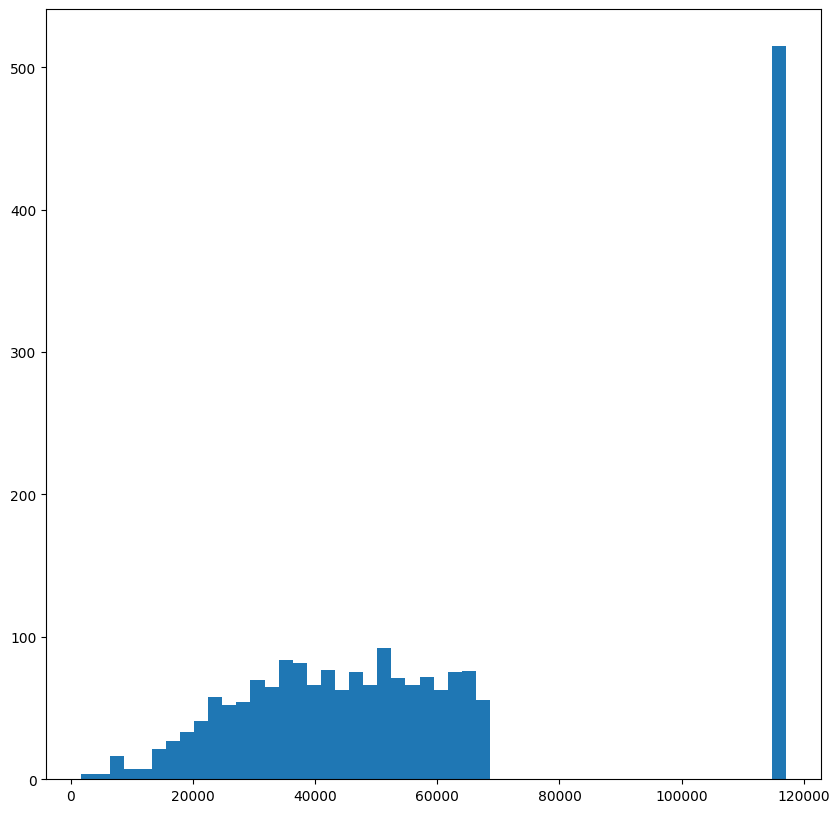

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['income'],bins=50)

In [ ]:

df_complaints = df[df['complain'] == 1]
income_bins = [1000, 20000, 50000, 100000, 1600000]
income_labels = ['1k-20k', '20k-50k', '50k-100k', '100k-1600k']

df_complaints['income'] = pd.cut(df_complaints['income'], bins=income_bins, labels=income_labels)


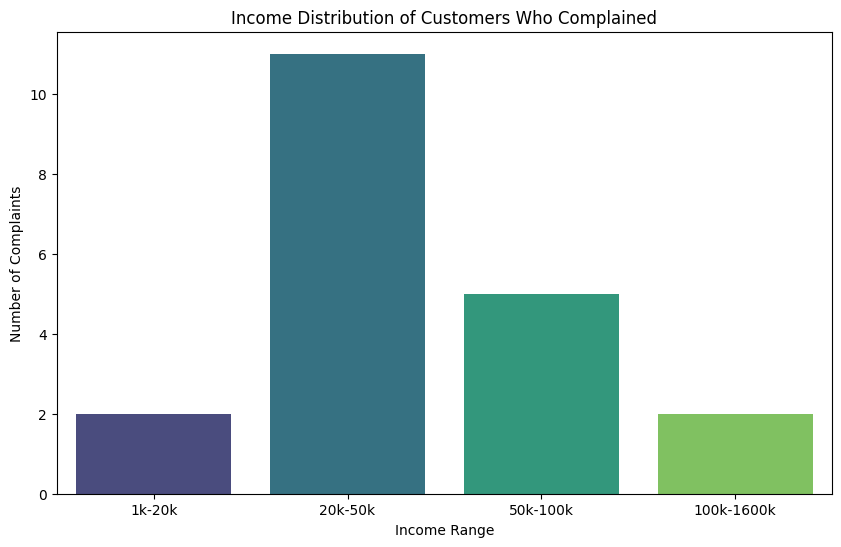

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df_complaints, palette='viridis')
plt.title('Income Distribution of Customers Who Complained')
plt.xlabel('Income Range')
plt.ylabel('Number of Complaints')
plt.show()


In [ ]:
cmp1=df['acceptedcmp1'].sum()
cmp2=df['acceptedcmp2'].sum()
cmp3=df['acceptedcmp3'].sum()
cmp4=df['acceptedcmp4'].sum()
cmp5=df['acceptedcmp5'].sum()

Text(0, 0.5, 'Acceptance')

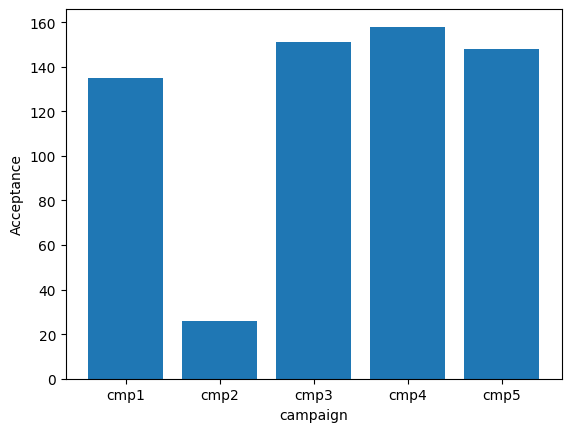

In [ ]:
category=['cmp1','cmp2','cmp3','cmp4','cmp5']
values=[cmp1,cmp2,cmp3,cmp4,cmp5]
plt.bar(category,values)
plt.xlabel('campaign')
plt.ylabel('Acceptance')

In [ ]:
df['mntwines'][df['mntwines']==1].count()

33

Text(0, 0.5, 'frequency')

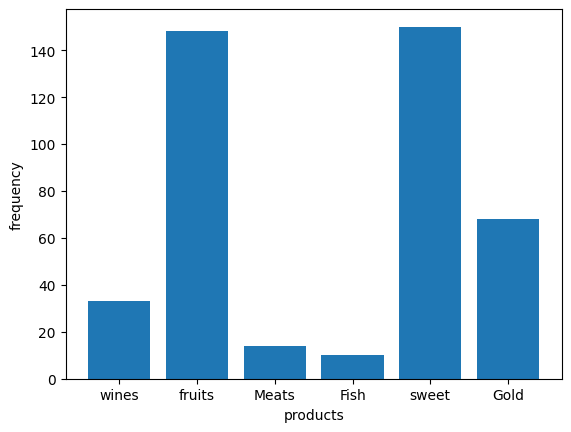

In [ ]:
category=['wines','fruits','Meats','Fish','sweet','Gold']
values=[df['mntwines'][df['mntwines']==1].count(),df['mntfruits'][df['mntfruits']==1].count(),df['mntmeatproducts'][df['mntmeatproducts']==1].count(),df['mntfishproducts'][df['mntfishproducts']==1].count(),df['mntsweetproducts'][df['mntsweetproducts']==1].count(),df['mntgoldprods'][df['mntgoldprods']==1].count()]
plt.bar(category,values)
plt.xlabel('products')
plt.ylabel('frequency')